In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

from pandas import read_csv

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.ar_model import AutoReg

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [36]:
data = read_csv('data/agg/BTC_agg_OI_FR.csv', parse_dates=['timestamp'])
data

,timestamp,Agg Weighted FR,Agg OI
0,2020-04-01,-0.039073,6.966046e+08
1,2020-04-02,0.006521,6.665020e+08
2,2020-04-03,-0.021530,6.837366e+08
3,2020-04-04,-0.008062,6.865173e+08
4,2020-04-05,0.001697,6.757367e+08
...,...,...,...
1365,2023-12-27,0.029520,3.147515e+09
1366,2023-12-28,0.030703,3.135693e+09
1367,2023-12-29,0.019693,3.065951e+09
1368,2023-12-30,0.025019,3.101645e+09


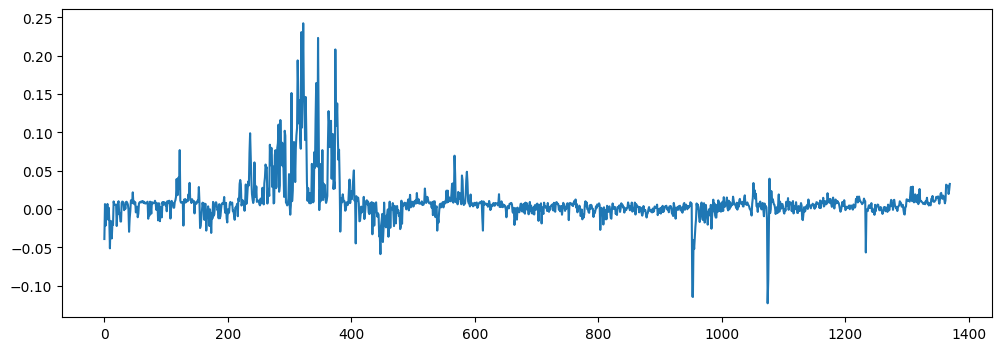

In [37]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))

plt.plot(data.index, data['Agg Weighted FR'])
plt.show()

In [38]:
def check_stationarity(series):
    result = adfuller(series.values)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    print('Stationary') if (result[1] <= 0.05) & (result[4]['5%'] > result[0]) else print('Non-stationary')

In [39]:
check_stationarity(data['Agg Weighted FR'])

ADF Statistic: -3.114494
p-value: 0.025499
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
Stationary


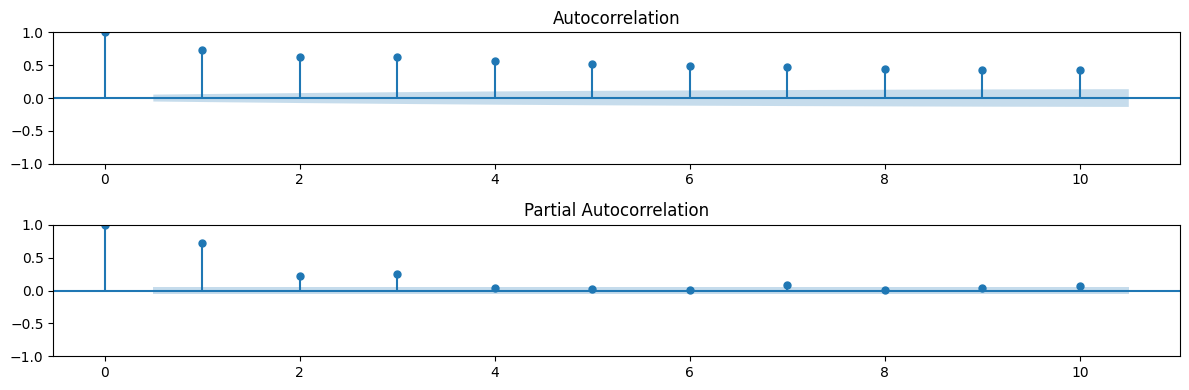

In [40]:
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 4))

plot_acf(data['Agg Weighted FR'], lags=10, ax=ax[0])
plot_pacf(data['Agg Weighted FR'], lags=10, ax=ax[1], method='ols')

plt.tight_layout()
plt.show()

In [41]:
num_samples = len(data)
train_len = int(0.8* num_samples)

                            AutoReg Model Results                             
Dep. Variable:        Agg Weighted FR   No. Observations:                 1096
Model:                     AutoReg(2)   Log Likelihood                2715.868
Method:               Conditional MLE   S.D. of innovations              0.020
Date:                Tue, 27 Feb 2024   AIC                          -5423.736
Time:                        18:56:35   BIC                          -5403.745
Sample:                             2   HQIC                         -5416.171
                                 1096                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0021      0.001      3.285      0.001       0.001       0.003
Agg Weighted FR.L1     0.5742      0.029     19.468      0.000       0.516       0.632
Agg Weighted FR.L2  

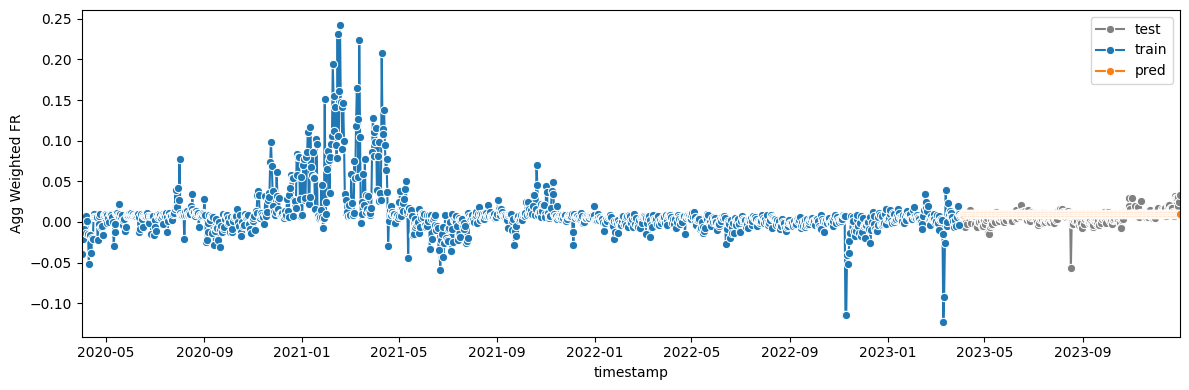

In [46]:
train = data['Agg Weighted FR'][:train_len]
ar_model = AutoReg(train, lags=2).fit()

print(ar_model.summary())
pred = ar_model.predict(start=train_len, end=num_samples, dynamic=False)

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))
sns.lineplot(x=data.timestamp[train_len:num_samples], y=data['Agg Weighted FR'][train_len:num_samples], marker='o', label='test', color='grey')
sns.lineplot(x=data.timestamp[:train_len], y=train, marker='o', label='train')
sns.lineplot(x=data.timestamp[train_len:num_samples], y=pred, marker='o', label='pred')
ax.set_xlim([data.timestamp.iloc[0], data.timestamp.iloc[-1]])
plt.tight_layout()
plt.show()

In [49]:
pred.values[pred.values < 0]

array([], dtype=float64)